In [12]:
import os
import cv2
from PIL import Image
import numpy as np
from google.colab import drive
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
drive.mount("/content/drive")
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#infected = os.listdir("/content/drive/My Drive/ИАД/LR2/DATA/Parasitized/Parasitized.zip (Unzipped Files)/Parasitized")
#uninfected = os.listdir("/content/drive/My Drive/ИАД/LR2/DATA/Uninfected/Uninfected.zip (Unzipped Files)/Uninfected")
labels_path = "/content/drive/My Drive/ИАД/LR2/Temp/labels.npy"
cells_path = "/content/drive/My Drive/ИАД/LR2/Temp/Cells.npy"

In [ ]:
data = [] # общий список картинок
labels = [] # метки

count = 0

for i in infected:
  count += 1
  image = cv2.imread("/content/drive/My Drive/ИАД/LR2/DATA/Parasitized/Parasitized.zip (Unzipped Files)/Parasitized/"+i)
  image_from_array = Image.fromarray(image, 'RGB')
  size_image = image_from_array.resize((50, 50))
  data.append(np.array(size_image))
  labels.append(1)
  print(count)

In [ ]:
count = 0
labels1 = []
for j in uninfected:
  count += 1
  image=cv2.imread("/content/drive/My Drive/ИАД/LR2/DATA/Uninfected/Uninfected.zip (Unzipped Files)/Uninfected/"+j)
  image_from_array = Image.fromarray(image, 'RGB')
  size_image = image_from_array.resize((50, 50))
  data.append(np.array(size_image))
  labels1.append(0)
  print(count)

In [ ]:
test = []
test = np.stack((labels, labels1))
print(test)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]]


In [ ]:
Cells=np.array(data) 
labels=np.array(labels)
np.save("/content/drive/My Drive/ИАД/LR2/Temp/labels1.npy", labels1)
np.save(cells_path ,Cells)
np.save(labels_path ,labels)

Начинать тут

In [14]:
Cells=np.load(cells_path)
labels=np.load("/content/drive/My Drive/ИАД/LR2/Temp/labels_final.npy")



In [15]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [16]:
num_classes=len(np.unique(labels))
len_data=len(Cells)
print(num_classes)
print(len_data)

2
27560


In [17]:
(x_train,x_test)=Cells[(int)(0.2*len_data):],Cells[:(int)(0.2*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

In [18]:
print(train_len)
print(test_len)

22048
5512


One hot encoding

In [19]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [20]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)         

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 40s 90ms/step - loss: 0.3662 - accuracy: 0.8243
Epoch 2/20
441/441 [==============================] - 40s 90ms/step - loss: 0.1623 - accuracy: 0.9478
Epoch 3/20
441/441 [==============================] - 40s 90ms/step - loss: 0.1413 - accuracy: 0.9545
Epoch 4/20
441/441 [==============================] - 40s 91ms/step - loss: 0.1299 - accuracy: 0.9580
Epoch 5/20
441/441 [==============================] - 40s 91ms/step - loss: 0.1223 - accuracy: 0.9595
Epoch 6/20
441/441 [==============================] - 40s 91ms/step - loss: 0.1147 - accuracy: 0.9616
Epoch 7/20
441/441 [==============================] - 41s 92ms/step - loss: 0.1073 - accuracy: 0.9631
Epoch 8/20
441/441 [==============================] - 40s 91ms/step - loss: 0.1020 - accuracy: 0.9634
Epoch 9/20
441/441 [==============================] - 41s 92ms/step - loss: 0.0960 - accuracy: 0.9663
Epoch 10/20
441/441 [==============================] - 40s 91ms/step - loss: 0.089

In [22]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

173/173 [==============================] - 4s 22ms/step - loss: 0.1919 - accuracy: 0.9541

 Test_Accuracy:- 0.9541001319885254


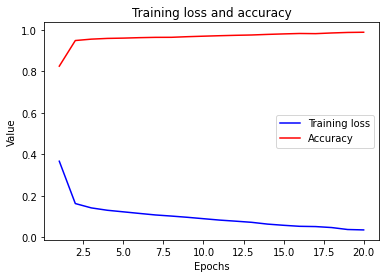

In [23]:
def draw_graph(history):
    loss_values = history["loss"]
    accuracy_values = history["accuracy"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, accuracy_values, 'r', label='Accuracy')
    plt.title('Training loss and accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_graph(history.history)


In [24]:
from keras.models import load_model
model.save('/content/drive/My Drive/ИАД/LR2/cells.h5')

1/1 [==============================] - 0s 2ms/step
Paracitized 
Accuracy =  1.0


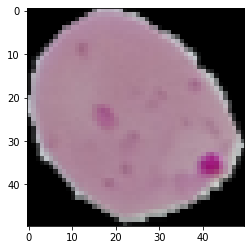

In [63]:
import os

def convert_to_array(img):
    im = cv2.imread(img)
    img_ = Image.fromarray(im, 'RGB')
    image = img_.resize((50, 50))
    return np.array(image)

def get_cell_name(label):
    if label==1:
        return "Paracitized"
    if label==0:
        return "Uninfected"

model = load_model('/content/drive/My Drive/ИАД/LR2/cells.h5')

PICTURE_NUMBER = 100
img = plt.imshow(x_test[PICTURE_NUMBER], cmap=plt.get_cmap('gray'))
img = img.get_figure()
img.savefig("/content/drive/My Drive/ИАД/test1.png")
PATH = "/content/drive/My Drive/ИАД/test1.png"

ar=convert_to_array(PATH)
os.remove(PATH)
ar=ar/255
label=1
a=[]
a.append(ar)
a=np.array(a)
score=model.predict(a,verbose=1)
label_index=np.argmax(score)
acc=np.max(score)
Cell=get_cell_name(label_index)
print(Cell,"\nAccuracy =  "+ str(acc))